<a href="https://colab.research.google.com/github/Rogerio-mack/Temporal/blob/main/Gabarito_Kmedias_Lab_2023_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="left"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

In [37]:
# imports

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# acrescente seus imports aqui
from sklearn.cluster import KMeans

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">Lab Kmeans </font></h1>
<hr>

##Caso: **Segmentando Clientes de um Mall**

Aqui você encontrará dados de 200 clientes de uma loja de Shopping com dados de idade, renda, sexo e score de gastos na loja. Você seguimentará esses clientes tentando obter e caracterizar grupos distintos de clientes para poder tomar decisões sobre como atuar sobre esses grupos (campanhas, ofertas de produtos etc.).




In [57]:
# Seu código
df1=pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/Mall_Customers.csv')
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exercício. Explore os dados

Note que existe um atributo nos dados que não faz sentido ser incluído no modelo. Exclua esse atributo. Chame a nova base de dados de `df`

In [58]:
# Seu código
df=df1.drop(columns="CustomerID")
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Exercício. Definindo a entrada `X`

As entradas `X` do `kmeans` precisam ser numéricas pois ele emprega a média das distâncias dos elementos. Converta o atributo `Gender` numérico, com 'Male' = 1 e 'Female' = 0.

In [59]:
# Seu código
df.Gender.replace("Male",1, inplace=True)
df.Gender.replace("Female",0, inplace=True)
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [60]:
df.Gender.sum()

88

## Exercício. Normalize os dados `Scaling`

O `kmeans` emprega distâncias e, portanto, é sensível à escala dos dados. Normalize os dados de `X` com o método `StandardScaler()` ou a função `scale( )` (solução mais simples)\*.


In [61]:
# Seu código
from sklearn.preprocessing import scale

X_matrix = scale(df)
df = pd.DataFrame(X_matrix,columns=df.columns, index=df.index)
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


Ótimo, seus dados agora devem aparecer todos com média 0 e desvio padrão 1.

## Exercício. Determine o número *ideal* de Clusters

O método da inércia ou regra do cotovelo, permite determinar o melhor número de cluster. Determine o número de cluster executando o código apresentado na teoria. Ele não precisa ser modificado se os dados de entradas estão corretamente em `X`.

\*nota: existem outras métricas e critérios para decidir o número de Clusters, por exemplo, o `Silhouette`. Para os nossos propósitos, entretanto, será suficiente empregarmos a regra do cotovelo com base na inércia dos grupos.

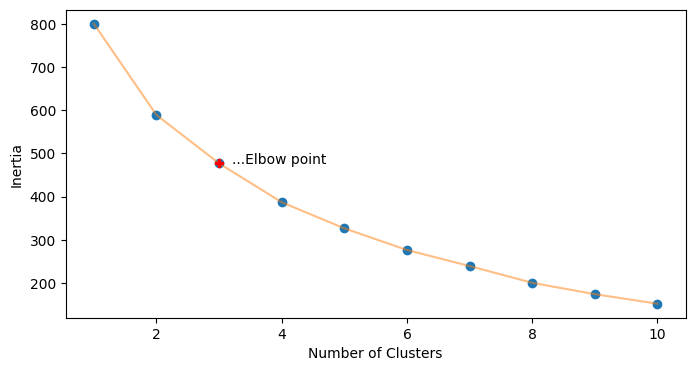

In [62]:
# Seu código
# Dados
from sklearn.cluster import KMeans

X = df

inertia = []
for n in range(1 , 11):
    clf = KMeans(n_clusters = n , random_state= 1984)
    clf.fit(X)
    inertia.append(clf.inertia_)

plt.figure(1 , figsize = (8 ,4))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')

# adicionado depois... ;-)
plt.plot(3 , inertia[2] , 'P', alpha = 1, color = 'red')
plt.text(3 + 0.2 , inertia[2] , '...Elbow point')

plt.show()

## Exercício. Declarando o modelo

Vamos segmentar nossos clientes em 3 grupos (na dúvida usar 3). Não deixe de empregar o `random_state= 123` na função `KMeans` para obter as mesmas respostas.

In [63]:
# Seu código
X = df
clf = KMeans(n_clusters = 3 , random_state= 123) # Declara o modelo
clf.fit(X) # Calcula

# Resultados
labels = clf.labels_
centroids = clf.cluster_centers_

print(labels)
print(centroids)

[0 0 1 0 1 0 1 0 2 0 2 0 1 0 2 0 1 0 2 0 2 0 1 0 1 0 1 0 1 0 2 0 2 0 1 0 1
 0 1 0 1 0 2 0 1 0 1 1 1 1 1 0 1 2 1 2 1 2 1 2 2 0 1 1 2 0 1 1 0 1 2 1 1 1
 2 0 1 2 0 1 2 2 2 1 0 2 1 0 1 1 1 0 2 1 1 0 1 1 2 0 1 1 2 0 2 1 1 2 2 2 2
 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 2 0 2 0 2 0 1 0 2 0 1 0 2 0 1 0 1 0 2 0 2 0
 1 0 2 0 1 0 1 0 2 0 2 0 1 0 2 0 2 0 2 0 1 0 2 0 2 0 1 0 2 0 2 0 1 0 2 0 1
 0 1 0 1 0 1 0 2 0 1 0 1 0 2 0]
[[ 0.09569148 -0.76790358  0.05687245  0.9389965 ]
 [-0.88640526  0.35241488 -0.10846569 -0.50971069]
 [ 1.12815215  0.74307816  0.06431159 -0.79449512]]


In [64]:
len(labels[labels==2])

49

## Exercício. Identificando na base de dados os grupos

Adicione uma nova coluna ao dataframe (nome: `cluster`) atribuindo os grupos `labels` obtidos acima para facilitar a identificação do grupo de cada cliente.

In [65]:
# seu código aqui
df1["cluster"]=labels
df1.head(11)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,1
5,6,Female,22,17,76,0
6,7,Female,35,18,6,1
7,8,Female,23,18,94,0
8,9,Male,64,19,3,2
9,10,Female,30,19,72,0


### A quais grupos pertencem os clientes de ID 8 e 11?

In [71]:
# seu código aqui
df1[df1.CustomerID.isin([8,11])]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
7,8,Female,23,18,94,0
10,11,Male,67,19,14,2


## Exercício. Caracterizando os grupos

O que exatamente representam esses grupos de clientes numerados 0, 1 e 2? Quais são as distinções que podem ser identificadas entre eles?

Uma maneira de abordar essa questão é examinar as médias dos valores associados a cada grupo e identificar as características que diferenciam um cliente médio de um grupo dos outros.

Empregue o modelo da teoria para exibir as médias dos valores de cada grupo e tente identificar que grupos de clientes estão sendo formados.

In [78]:
# Seu código
df1=df1.drop(columns="CustomerID", axis=1)
g = pd.DataFrame(df1.groupby('cluster').mean() ).reset_index()
g

,cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,28.150000,62.050000,74.387500
1,1,43.760563,57.718310,37.070423
2,2,49.204082,62.244898,29.734694


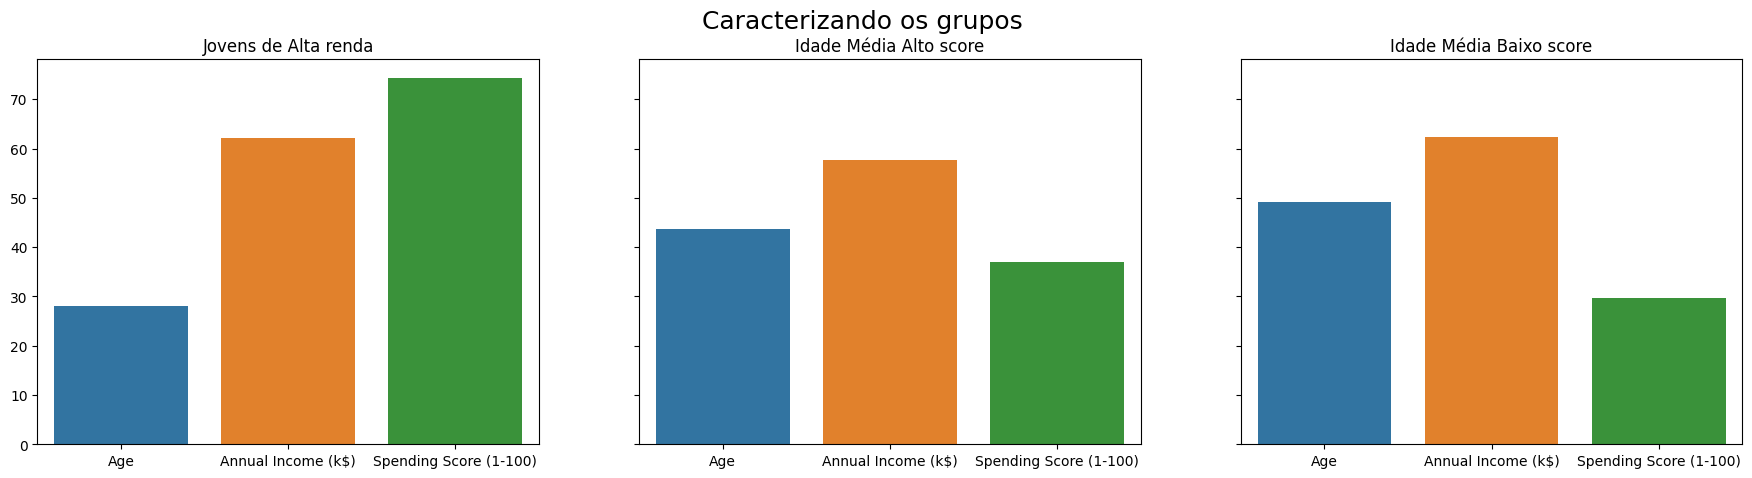

In [79]:
f, axis = plt.subplots(1,3, sharey='row', figsize=(22,5))

sns.barplot(data=g[g.cluster==0].drop(columns='cluster'),ax=axis[0])
axis[0].set_title('Jovens de Alta renda')
sns.barplot(data=g[g.cluster==1].drop(columns='cluster'),ax=axis[1])
axis[1].set_title('Idade Média Alto score')
sns.barplot(data=g[g.cluster==2].drop(columns='cluster'),ax=axis[2])
axis[2].set_title('Idade Média Baixo score')
plt.suptitle('Caracterizando os grupos',fontsize=18)
plt.show()


#### Utilizando os grupos

* Cenário **A**. A loja, em uma campanha de marketing, quer então presentear aluguns clientes com algo score com produtos para cabelos brancos. Para qual grupo/grupos ela deveria enviar os produtos?

* Cenário **B**. Ela ainda quer fazer uma oferta de produtos de celulares modernos e de luxo. Para qual grupo/grupos ela deveria ofertar esses produtos para maximizar sua chance de vendas?
